In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib qt

import numpy as np
import autoreject
import csv
import matplotlib.pyplot as plt
import pandas as pd
import mne
import os
import sys
#sys.path.append('../..')
from atpbar import atpbar
#from utils.csv_utils_new import *
#from utils.lsl_utils_new import *
#from utils.MNE_utils import *

import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# testing cleaning strategies

In [6]:
def get_evokeds(epochs):
    evokeds = {}
    for condition in ['1', '-1']:
        subset = epochs[condition]
        evokeds['standard' if condition == '1' else 'oddball'] = list(subset.iter_evoked())
    return evokeds

def plot_evokeds(evokeds, condition):
    mne.viz.plot_compare_evokeds(evokeds, picks='Fz', ci=0.95, title=f'Global oddball evoked response: {condition}')


def calculate_mmn(evokeds):
    # Ensure there are evoked responses for both conditions
    if 'standard' in evokeds and 'oddball' in evokeds:
        mmn = mne.combine_evoked([evokeds['standard'][0], evokeds['oddball'][0]], weights=[1, -1])
        return mmn
    else:
        raise ValueError("Standard and/or oddball evoked responses are missing.")


## Plot evoked plots

In [38]:
#for condition in ['jhana_mmn', 'mindfulness_mmn', 'control_mmn']:
#for ica in ['', '_noICA']:    
topo_map = False 


for sub in range(10):
#for sub in [8]:
    for condition in ['mindfulness', 'jhana']:
        fname = f'../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub{sub}_{condition}_epo.fif'
        #fname = f'../../data/mne_raw_events_epochs_cleaned_noICA_concatenated_01/mmn_sub{sub}_{condition}_epo.fif'
        #fname = f'../../data/mne_raw_events_epochs_cleaned_noICA_concatenated_03/mmn_sub{sub}_{condition}_epo.fif'
        #fname = f'../../data/mne_raw_events_epochs_cleaned_noICA_noAutoreject_concatenated/mmn_sub{sub}_{condition}_epo.fif'
        
    
        epochs = mne.read_epochs(fname)    
        epochs.filter(None, 20)
        #epochs.drop_bad(reject={'eeg': 100e-6})
        #epochs.crop(tmax=0.5)

        groups=dict(frontal=[0,1,2,3,4, 6,7,8, 11, 12, 16]) #['Fp1', 'Fpz', 'Fp2', 'AF3', 'AF4', 'F3', 'Fz', 'F4', 'FC1', 'FC2', 'Cz']
        groups=dict(frontal=[7]) #['Fz']
        
        frontal = mne.channels.combine_channels(epochs, groups, method="mean")
        #frontal.drop_bad(reject={'eeg': 100e-6})
        #evokeds_ave_frontal = [frontal[name].average() for name in ("-1", "1")]
        frontal_evokeds = get_evokeds(frontal)
        mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
        
        if topo_map: 
            evokeds_ave = [epochs[name].copy().average() for name in ("-1", "1")]
            title = f"mmn_sub{sub}_{condition}"
            mne.viz.plot_evoked_topo(evokeds_ave, color=colors, title=title, background_color="w", ylim=dict(eeg=[-10, 10]))
        
                    

        """
        evokeds_ave = [frontal[name].copy().average() for name in ("-1", "1")]
        # Compute the difference between the two evoked responses
        evoked_diff = evokeds_ave[1].copy()
        evoked_diff.data -= evokeds_ave[0].data
        evoked_diff.comment = 'Difference'

        # Plot the difference evoked response
        evoked_diff.plot(titles='Difference between -1 and 1')
        """


        
        """
        evokeds = get_evokeds(epochs)
        mne.viz.plot_compare_evokeds(evokeds, picks='Fz', ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
        """
        
        plt.savefig(f'../../results/mmn/mmn_sub{sub}_{condition}_epo.png')
        #plt.close()

"""
    #    mmn = calculate_mmn(evokeds)
    #    mne.viz.plot_evoked(mmn, picks='Fz', title='Mismatch Negativity (MMN)')
    
        oddball = epochs["-1"].average()
        standard = epochs["1"].average()
    
    
        oddball.plot_joint(times=[0, 0.03, 0.15, 0.35], title=f"oddball: {condition}")
        standard.plot_joint(times=[0, 0.03, 0.15, 0.35], title=f"standard: {condition}")
    
        oddball.plot_joint(times=[0, 0.03, 0.15, 0.35], title=f"oddball: {condition}, Fz", picks='Fz')
        standard.plot_joint(times=[0, 0.03, 0.15, 0.35], title=f"standard: {condition}, Fz", picks='Fz')
        
        #standard_minus_oddball = mne.combine_evoked([standard, oddball], weights=[1, -1])
        #standard_minus_oddball.plot_joint(times=[0, 0.03, 0.15, 0.35])
"""

Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub0_mindfulness_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1447 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    0.2s
[Parallel(n_job

Not setting metadata
1447 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 43217 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 44999 tasks      | elapsed:    1.6s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub0_jhana_epo.fif ...


/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1437 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    0.2s
[Parallel(n_job

Not setting metadata
1437 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 43217 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 44999 tasks      | elapsed:    1.6s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub1_mindfulness_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1273 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
1273 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 38087 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 39761 tasks      | elapsed:    1.4s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub1_jhana_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1437 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
1437 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 44999 tasks      | elapsed:    1.6s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub2_mindfulness_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1057 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
1057 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 31751 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 33281 tasks      | elapsed:    1.2s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub2_jhana_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1317 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
1317 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 38087 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 39761 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 41471 tasks      | elapsed:    1.5s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub3_mindfulness_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
854 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
854 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 25991 tasks      | elapsed:    0.9s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub3_jhana_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
941 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
941 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 25991 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 27377 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 28799 tasks      | elapsed:    1.0s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub4_mindfulness_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1148 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
1148 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub4_jhana_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1146 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
1146 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub5_mindfulness_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1280 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
1280 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 38087 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 39761 tasks      | elapsed:    1.4s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub5_jhana_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1357 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
1357 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub6_mindfulness_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1229 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
1229 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 36449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 38087 tasks      | elapsed:    1.4s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub6_jhana_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1397 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
1397 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 43217 tasks      | elapsed:    1.6s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub7_mindfulness_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
763 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
763 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 20807 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 22049 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 23327 tasks      | elapsed:    0.9s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub7_jhana_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1433 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
1433 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 43217 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 44999 tasks      | elapsed:    1.6s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub8_mindfulness_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1262 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
1262 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 36449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 38087 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 39761 tasks      | elapsed:    1.5s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub8_jhana_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1185 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
1185 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 36449 tasks      | elapsed:    1.3s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub9_mindfulness_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1373 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
1373 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 43217 tasks      | elapsed:    1.6s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_events_epochs_cleaned_concatenated/mmn_sub9_jhana_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1354 matching events found
No baseline correction applied
0 projection items activated
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 169 samples (0.660 s)



/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(frontal_evokeds, ci=0.95, title=f'Global oddball evoked response: {condition}_sub_{sub}')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)

Not setting metadata
1354 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done 43217 tasks      | elapsed:    1.6s
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:23: RuntimeWarning: Less than 2 channels in group "frontal" when combining by method "functools.partial(<function mean at 0x108fa8e70>, axis=1)".
  frontal = mne.channels.combine_channels(epochs, groups, method="mean")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mne/viz/evoked.py:2946: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots(figsize=(8, 6), layout="constrained")[1] for _ in ch_types
/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/426293880.py:27: RuntimeWarning: Cannot find channel coordinates in the supplied Evoke

'\n    #    mmn = calculate_mmn(evokeds)\n    #    mne.viz.plot_evoked(mmn, picks=\'Fz\', title=\'Mismatch Negativity (MMN)\')\n    \n        oddball = epochs["-1"].average()\n        standard = epochs["1"].average()\n    \n    \n        oddball.plot_joint(times=[0, 0.03, 0.15, 0.35], title=f"oddball: {condition}")\n        standard.plot_joint(times=[0, 0.03, 0.15, 0.35], title=f"standard: {condition}")\n    \n        oddball.plot_joint(times=[0, 0.03, 0.15, 0.35], title=f"oddball: {condition}, Fz", picks=\'Fz\')\n        standard.plot_joint(times=[0, 0.03, 0.15, 0.35], title=f"standard: {condition}, Fz", picks=\'Fz\')\n        \n        #standard_minus_oddball = mne.combine_evoked([standard, oddball], weights=[1, -1])\n        #standard_minus_oddball.plot_joint(times=[0, 0.03, 0.15, 0.35])\n'

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


Opening raw data file /Users/jonasmago/PhD_code_data/github/eeg_jhana/data/mne_raw_events/sub8-day4-jhana_mmn-raw_phot-events.fif...
    Range : 256 ... 227039 =      1.000 ...   886.871 secs
Ready.


/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_2172/2506164977.py:2: RuntimeWarning: This filename (/Users/jonasmago/PhD_code_data/github/eeg_jhana/data/mne_raw_events/sub8-day4-jhana_mmn-raw_phot-events.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path)


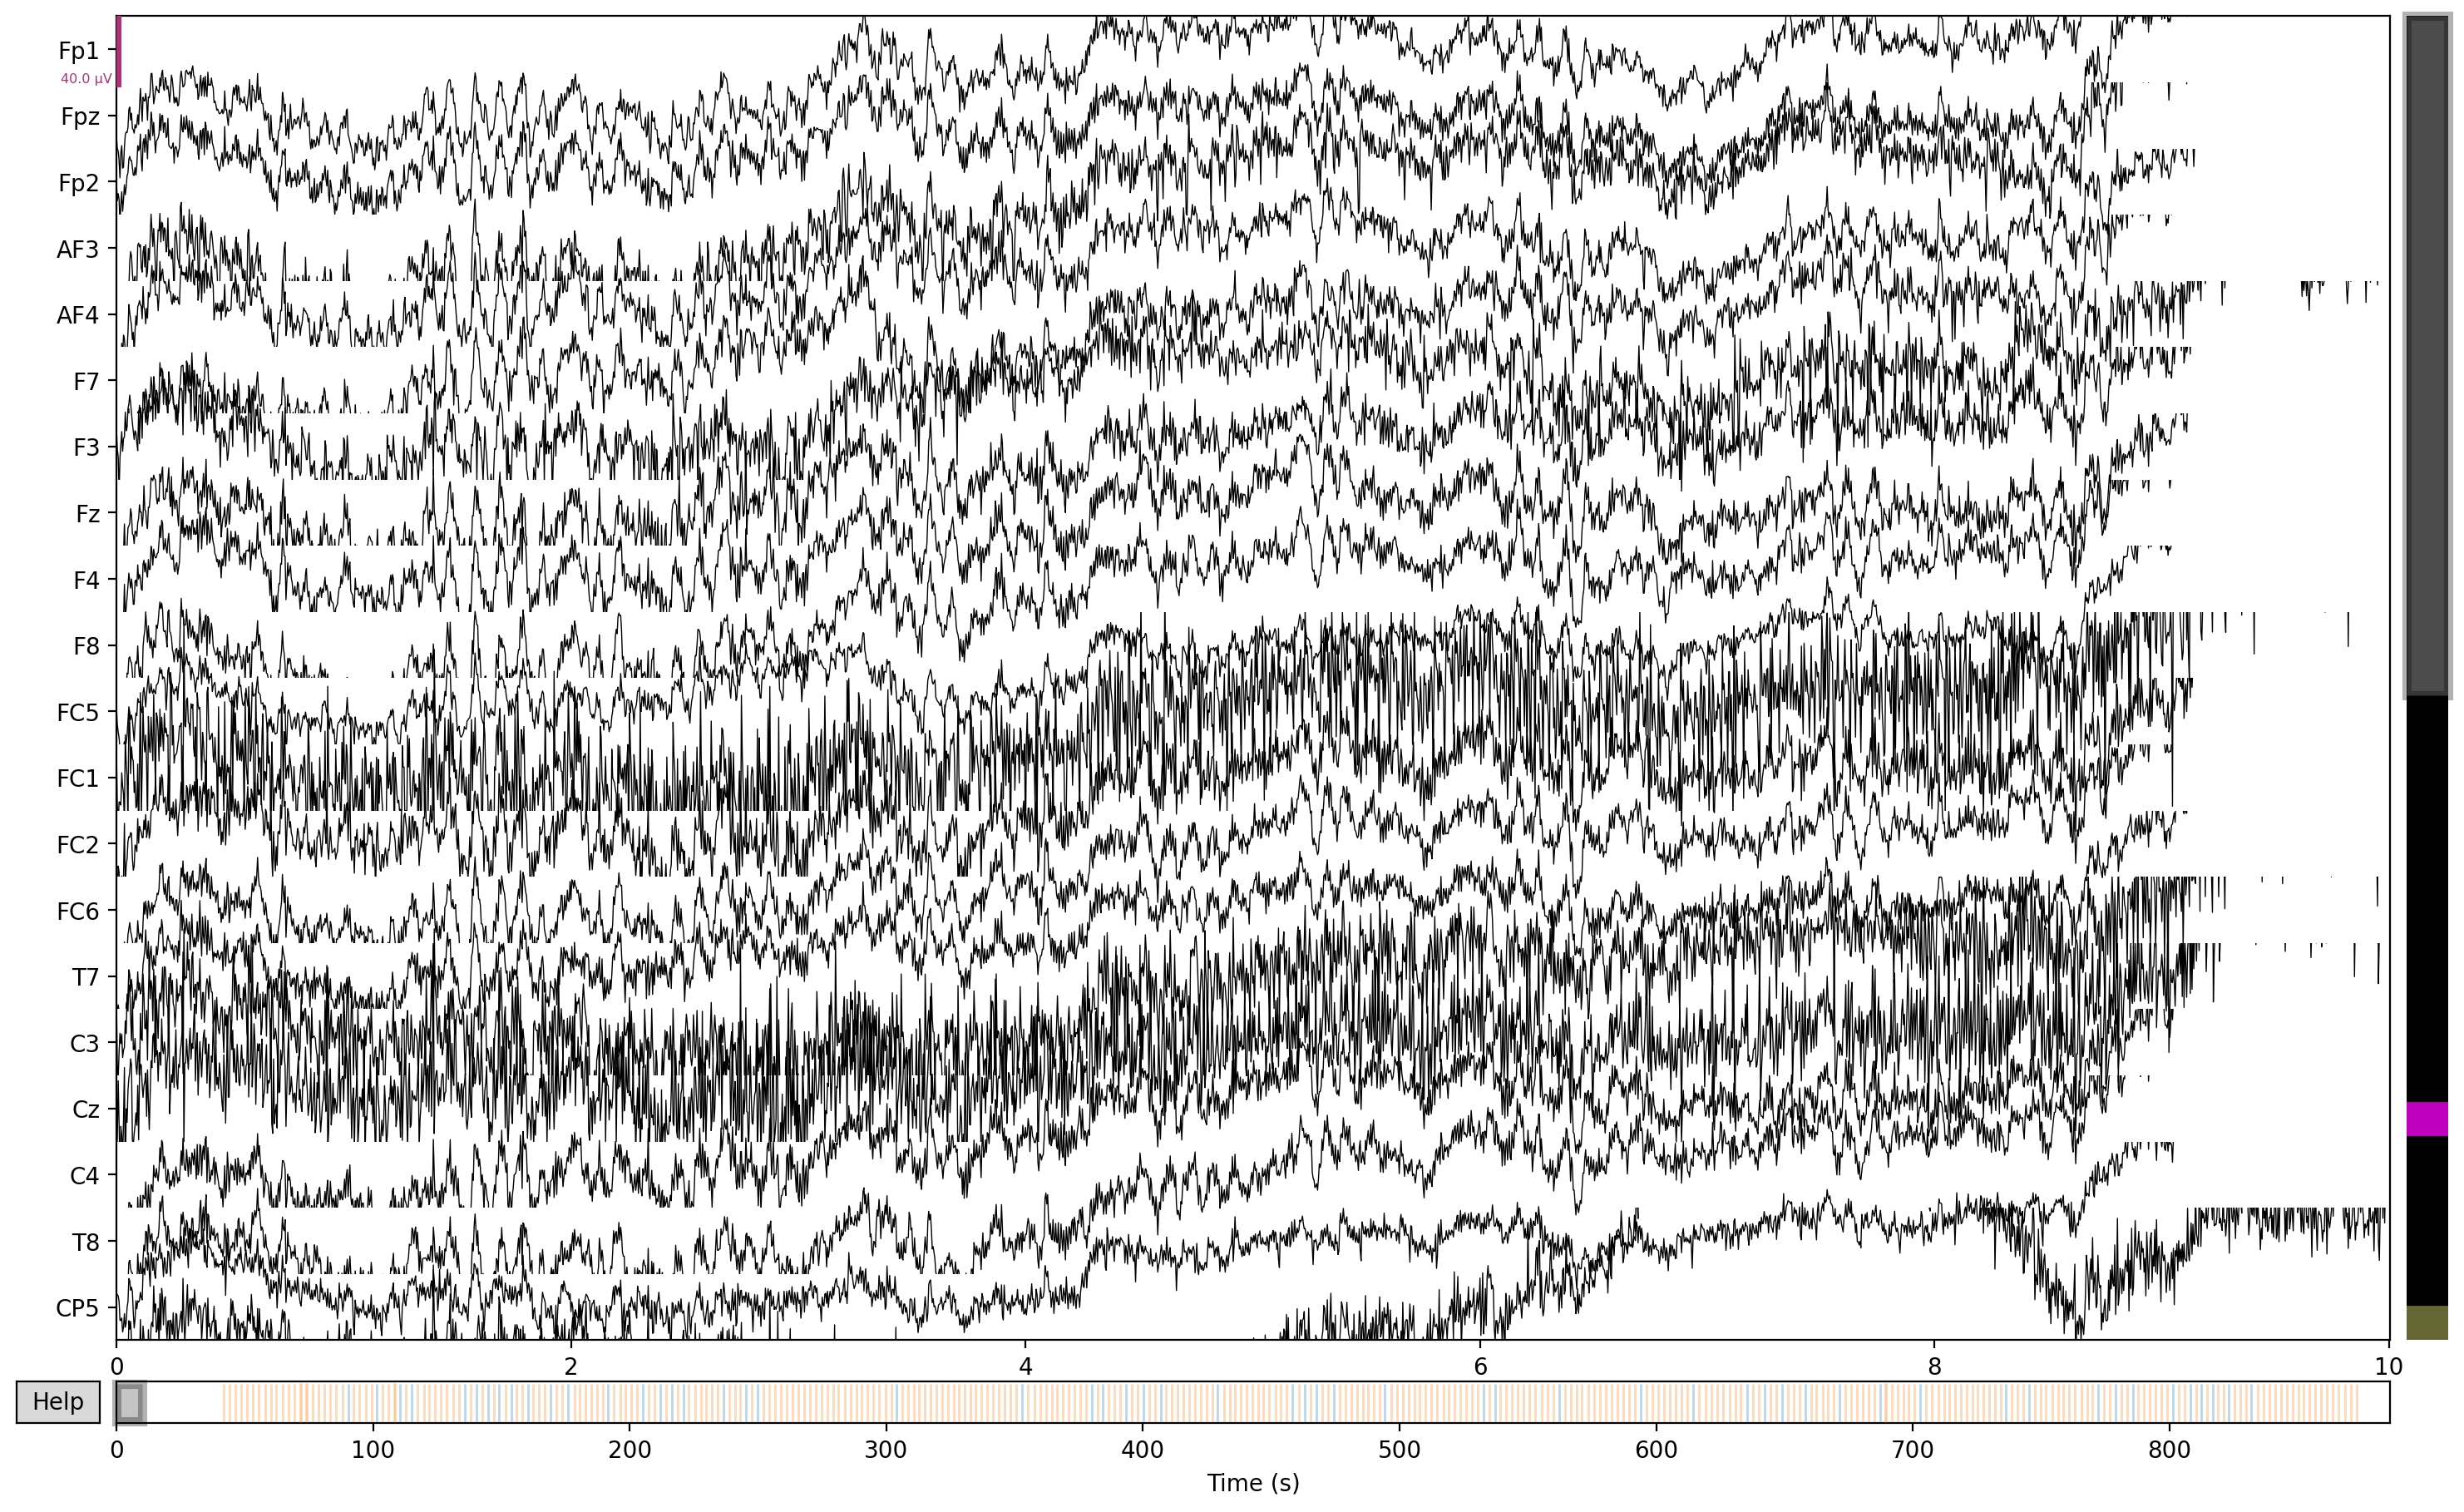

Channels marked as bad:
none


In [43]:
path = '/Users/jonasmago/PhD_code_data/github/eeg_jhana/data/mne_raw_events/sub8-day4-jhana_mmn-raw_phot-events.fif'
raw = mne.io.read_raw_fif(path)
raw.plot()

## Stats tests

In [45]:
import os
import pandas as pd
import numpy as np
import mne
from scipy.stats import ttest_ind, ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_compute_mean_amplitude(base_path, subject, day, meditation, condition, time_window, channel='Fz'):
    """
    Load the evoked data and compute the mean amplitude over a specified time window.
    """
    condition_map = {-1: 'oddball', 1: 'standard'}
    filename = f"{subject}-{day}-{meditation}_mmn-raw_phot-events-{condition}-ave.fif"
    file_path = os.path.join(base_path, filename)
    try:
        evoked = mne.read_evokeds(file_path, condition=0, baseline=None)
        start, end = [np.searchsorted(evoked.times, t) for t in time_window]
        mean_amplitude = np.mean(evoked.copy().pick_channels([channel]).data[:, start:end])
        return mean_amplitude
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return np.nan

def create_dataframe(base_path, subjects, days, meditations, time_windows, channel='Fz'):
    """
    Create a DataFrame with mean amplitude data for specified conditions and time windows.
    """
    data = []
    for subject in subjects:
        for day in days:
            for meditation in meditations:
                amplitudes = {tw_name: {'standard': None, 'oddball': None, 'difference': None} for tw_name in time_windows}
                for condition, cond_name in [(-1, 'oddball'), (1, 'standard')]:
                    for tw_name, time_window in time_windows.items():
                        amp = load_and_compute_mean_amplitude(base_path, subject, day, meditation, condition, time_window, channel)
                        amplitudes[tw_name][cond_name] = amp
                for tw_name in time_windows:
                    amplitudes[tw_name]['difference'] = amplitudes[tw_name]['oddball'] - amplitudes[tw_name]['standard']
                    for key in amplitudes[tw_name]:
                        data.append({
                            'subject': subject,
                            'day': day,
                            'meditation': meditation,
                            'time_window': tw_name,
                            'condition': key,
                            'amplitude': amplitudes[tw_name][key]
                        })
    return pd.DataFrame(data)


In [58]:
base_path = '../../data/mne_raw_epochs_ar_ave'
subjects = ['sub0', 'sub1', 'sub2', 'sub3', 'sub4', 'sub5', 'sub6', 'sub7', 'sub8', 'sub9']
days = ['day1', 'day2', 'day3', 'day4']
meditations = ['jhana', 'mindfulness']
time_windows = {'window1': (0.1, 0.25), 'window2': (0.25, 0.5), 'window3': (0.7, 0.8)}

df = create_dataframe(base_path, subjects, days, meditations, time_windows)
df["amplitude"]= df["amplitude"]*10**6
print(df.head())


Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub0-day1-jhana_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 56 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub0-day1-jhana_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 56 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline

Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub0-day2-jhana_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 321 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub0-day2-jhana_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        

        0 CTF compensation matrices available
        nave = 306 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub0-day3-mindfulness_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub0-d

    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub0-day4-mindfulness_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 315 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/

Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub1-day1-mindfulness_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 282 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub1-day2-jhana_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is bas

Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub1-day3-jhana_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 63 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub1-day3-jhana_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
       

        0 CTF compensation matrices available
        nave = 201 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub1-day4-jhana_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 201 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub1-day4-min

    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 57 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub2-day1-mindfulness_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 57 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github

Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub2-day3-jhana_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub2-day3-jhana_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline

Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub2-day4-jhana_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 165 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub2-day4-jhana_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        

        0 CTF compensation matrices available
        nave = 25 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub3-day1-mindfulness_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 25 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub3-da

    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 60 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub3-day3-jhana_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 60 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_j

Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub3-day4-jhana_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 227 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub3-day4-jhana_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 227 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-c

Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub4-day1-mindfulness_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub4-day1-mindfulness_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices ava

        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 39 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub4-day2-mindfulness_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 246 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked respo

Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub4-day3-mindfulness_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 286 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub4-day4-jhana_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 39 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is bas

Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub5-day1-jhana_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 63 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub5-day1-jhana_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
       

        0 CTF compensation matrices available
        nave = 310 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub5-day2-jhana_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 310 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub5-day2-min

    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 57 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub5-day3-mindfulness_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 57 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github

Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub5-day4-mindfulness_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 249 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub5-day4-mindfulness_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 249 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data i

Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub6-day2-jhana_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 58 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub6-day2-jhana_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
     

        0 CTF compensation matrices available
        nave = 270 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub6-day3-jhana_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 270 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub6-day3-jha

    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 35 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub6-day4-mindfulness_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 35 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github

Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub7-day1-mindfulness_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 300 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub7-day1-mindfulness_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 300 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data i

Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub7-day3-jhana_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub7-day3-jhana_mmn-raw_phot-events--1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (-1)
        0 CTF compensation matrices available
     

        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub7-day4-jhana_mmn-raw_phot-events-1-ave.fif ...
    Found the data of interest:
        t =     -50.78 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 301 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/evoked responses/../../data/mne_raw_epochs_ar_ave/sub7-day4-jhan

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [59]:
np.mean((df[(df['condition'] == 'oddball') & (df['meditation'] == 'mindfulness') & (df['time_window'] == 'window3')]['amplitude']))


0.6898468437657881

In [62]:
# Filtering data
oddball_data = df[(df['condition'] == 'oddball') & (df['time_window'] == 'window3')]['amplitude']
standard_data = df[(df['condition'] == 'standard') & (df['time_window'] == 'window3')]['amplitude']

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(oddball_data.index, oddball_data, color='blue', alpha=0.5, label='Oddball')
plt.scatter(standard_data.index, standard_data, color='red', alpha=0.5, label='Standard')

# Calculate and plot means and standard deviations
oddball_mean, oddball_std = oddball_data.mean(), oddball_data.std()
standard_mean, standard_std = standard_data.mean(), standard_data.std()

plt.axhline(oddball_mean, color='blue', linestyle='--', label=f'Oddball Mean: {oddball_mean:.2f}')
plt.axhline(standard_mean, color='red', linestyle='--', label=f'Standard Mean: {standard_mean:.2f}')

plt.fill_betweenx(np.arange(-0.00002, 0.0001, 0.1), oddball_mean - oddball_std, oddball_mean + oddball_std, color='blue', alpha=0.2)
plt.fill_betweenx(np.arange(-0.00002, 0.0001, 0.1), standard_mean - standard_std, standard_mean + standard_std, color='red', alpha=0.2)

plt.legend()
plt.title('Amplitude Distributions for Oddball vs Standard Conditions')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()

In [24]:
np.mean(df[(df['condition'] == 'difference') & (df['time_window'] == 'window1') & (df['meditation'] == 'mindfulness')]['amplitude'])


-1.0675958314833614e-06

In [17]:
diff_df

,subject,day,meditation,time_window,condition,amplitude
2,sub0,day1,jhana,window1,difference,-3.224270e-06
5,sub0,day1,jhana,window2,difference,-1.513537e-06
8,sub0,day1,mindfulness,window1,difference,-9.256081e-07
11,sub0,day1,mindfulness,window2,difference,-4.702707e-07
14,sub0,day2,jhana,window1,difference,-2.118963e-06
...,...,...,...,...,...,...
467,sub9,day3,mindfulness,window2,difference,3.414780e-07
470,sub9,day4,jhana,window1,difference,-1.263578e-06
473,sub9,day4,jhana,window2,difference,4.588144e-07
476,sub9,day4,mindfulness,window1,difference,-5.169496e-07


In [14]:
diff_df = df[df['condition'] == 'difference']
jhana_diffs = diff_df[diff_df['meditation'] == 'jhana']['amplitude']
mindfulness_diffs = diff_df[diff_df['meditation'] == 'mindfulness']['amplitude']

t_stat, p_val = ttest_ind(jhana_diffs, mindfulness_diffs)
print(f"Unpaired t-test results: t-statistic={t_stat}, p-value={p_val}")


Unpaired t-test results: t-statistic=nan, p-value=nan


In [65]:
# This requires matching pairs between days and subjects, which your data structure should support
paired_df = diff_df.pivot(index=['subject', 'day'], columns='meditation', values='amplitude').dropna()
t_stat, p_val = ttest_rel(paired_df['jhana'], paired_df['mindfulness'])
print(f"Paired t-test results: t-statistic={t_stat}, p-value={p_val}")


ValueError: Index contains duplicate entries, cannot reshape

In [44]:
# Loop through each time window to perform statistical tests and generate plots
for tw_name in time_windows.keys():
    # Filter the DataFrame for one specific time window
    diff_df_tw = diff_df[(diff_df['time_window'] == tw_name) & (diff_df['condition'] == 'difference')]
    # Perform unpaired t-test
    jhana_diffs = diff_df_tw[diff_df_tw['meditation'] == 'jhana']['amplitude'].dropna()
    mindfulness_diffs = diff_df_tw[diff_df_tw['meditation'] == 'mindfulness']['amplitude'].dropna()
    t_stat, p_val = ttest_ind(jhana_diffs, mindfulness_diffs)
    print(f"Unpaired t-test results for {tw_name}: t-statistic={t_stat}, p-value={p_val}")

    # Prepare data for paired t-test
    paired_df = diff_df_tw.pivot_table(index=['subject', 'day'], columns='meditation', values='amplitude', aggfunc='first').dropna()
    t_stat, p_val = ttest_rel(paired_df['jhana'], paired_df['mindfulness'])
    print(f"Paired t-test results for {tw_name}: t-statistic={t_stat}, p-value={p_val}")

    # Box plot for the current time window
    sns.boxplot(x='meditation', y='amplitude', data=diff_df_tw)
    plt.title(f'Difference between Oddball and Standard Conditions for {tw_name}')
    plt.xlabel('Meditation Type')
    plt.ylabel('Difference in Amplitude')
    plt.show()

    break


Unpaired t-test results for window1: t-statistic=0.8522666702381732, p-value=0.3967438730818519
Paired t-test results for window1: t-statistic=0.8419518781691405, p-value=0.40522420040658114
